In [1]:
import weather
import mongodb
import pandas as pd
import numpy as np
import musical_weather

In [2]:
first_time = True
if first_time:
    historical_weather, condensed, todays_forecast = weather.weather_main()
    print("Storing historical weather data...")
    weather.store_weather_data(historical_weather, "historical_raw")
    print("Storing historical summary data...")
    weather.store_weather_data(condensed, "historical_summary")
    print("Storing forecast weather data...")
    weather.store_weather_data(todays_forecast, "forecast")
    print("Weather data stored.")

Getting weather data for Seattle
Coordinates 52.5483283996582°N 13.407821655273438°E
Elevation 38.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Getting weather codes
Analyzing and weighing weather data
Getting today's forecast
Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s
No historical summary data available. Setting t-score to 0...
Storing historical weather data...
Storing historical summary data...
Storing forecast weather data...
Weather data stored.


## Get historical weather and forecast data

In [2]:
todays_forecast = weather.get_forecast()
pd.DataFrame(todays_forecast)

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


,date,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,sunshine_duration,...,shortwave_radiation_sum,et0_fao_evapotranspiration,season,description,image,weather_score,event,weight,weather_score_weighted,average_t_score
0,2024-06-02 07:00:00+00:00,80,76.541901,55.9319,74.898544,53.38242,0,0,59585.378906,42846.3125,...,21.1,0.170751,summer,Light Showers,http://openweathermap.org/img/wn/09d@2x.png,1,Rain,-85790.265625,-171580.53125,0.580345


In [3]:
historical_weather, historical_summary = musical_weather.get_stored_weather()
todays_forecast = musical_weather.get_forecast()

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


In [4]:
historical_weather.head()

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,season,description,weather_score,event,weight,weather_score_weighted,average_t_score
0,2014-06-01,2,64.650200,49.170200,57.138947,61.689705,45.978081,53.891354,0,0,...,18.567101,317.268646,24.600000,summer,Partly Cloudy,1,Cloud,106733.328125,213466.656250,-0.716156
1,2014-06-02,51,64.830200,48.180199,57.652695,62.277229,45.301971,54.428406,0,0,...,18.119701,17.676233,18.940001,summer,Light Drizzle,1,Rain,-60607.578125,-121215.156250,-1.162406
2,2014-06-03,53,66.270203,49.800201,59.058949,63.626461,47.680580,57.165218,0,0,...,14.987900,4.000119,16.260000,summer,Drizzle,1,Rain,-71824.382812,-143648.765625,-1.132314
3,2014-06-04,2,69.150200,55.200199,62.538940,67.358307,54.227848,60.809299,0,0,...,14.764199,117.019676,20.100000,summer,Partly Cloudy,1,Cloud,90910.937500,181821.875000,-0.288971
4,2014-06-05,61,67.260201,52.320198,59.928955,63.255253,49.723610,56.905182,0,0,...,26.844000,222.463196,16.719999,summer,Light Rain,1,Rain,-63945.484375,-127890.968750,0.097483


In [5]:
historical_summary.head()

,event,season,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,daylight_duration,sunshine_duration,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,shortwave_radiation_sum,snowfall_sum,weather_score,weight,weather_score_weighted
0,Sun,summer,83.719940,59.472443,72.818832,0.0,0.0,57024.207031,51499.468750,0.0,9.773933,19.733240,24.887594,0.0,1,103096.640625,206193.281250
1,Cloud,summer,76.856056,57.687473,68.048683,0.0,0.0,57499.152344,45940.343750,0.0,10.451530,21.213629,20.791733,0.0,1,91969.531250,183939.062500
2,Sun,spring,62.698631,40.319126,51.718662,0.0,0.0,50144.988281,45224.957031,0.0,10.893235,21.170155,20.704794,0.0,1,90522.335938,181044.671875
3,Sun,fall,69.853699,49.744976,59.367348,0.0,0.0,41713.230469,36749.195312,0.0,8.728711,17.305536,12.838256,0.0,1,73570.593750,147141.187500
4,Cloud,spring,58.077702,39.490162,49.195248,0.0,0.0,49781.386719,35765.523438,0.0,11.011491,20.972061,16.057940,0.0,1,71596.296875,143192.593750


In [6]:
pd.DataFrame(todays_forecast).head()

,date,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,sunshine_duration,...,shortwave_radiation_sum,et0_fao_evapotranspiration,season,description,image,weather_score,event,weight,weather_score_weighted,average_t_score
0,2024-06-02 07:00:00+00:00,80,76.541901,55.9319,74.898544,53.38242,0,0,59585.378906,42846.3125,...,21.1,0.170751,summer,Light Showers,http://openweathermap.org/img/wn/09d@2x.png,1,Rain,-85790.265625,-171580.53125,0.580345


In [7]:
todays_forecast['weather_score_weighted'][0]

-171580.53125

In [8]:
todays_forecast.select_dtypes(include=[np.number]).columns

Index(['weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'uv_index_max',
       'uv_index_clear_sky_max', 'precipitation_sum', 'rain_sum',
       'showers_sum', 'snowfall_sum', 'precipitation_hours',
       'precipitation_probability_max', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration',
       'weather_score', 'weight', 'weather_score_weighted', 'average_t_score'],
      dtype='object')

# Validating musical_weather.main

In [9]:
todays_score, historical_summary = musical_weather.main()
todays_score

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

-173561.9375

## Model fit and summary

In [10]:
model_base, model_fit = musical_weather.create_weather_model(historical_weather)
model_base

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     weather_score_weighted   No. Observations:                 7308
Model:                     ARIMA(5, 1, 0)   Log Likelihood              -96813.004
Date:                    Sat, 01 Jun 2024   AIC                         193638.008
Time:                            21:18:19   BIC                         193679.387
Sample:                                 0   HQIC                        193652.236
                                   - 7308                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6232      0.009    -65.714      0.000      -0.642      -0.605
ar.L2         -0.4560      0.011    -41.423      0.000      -0.478      -0.434
ar.L3         -0.3555      0.011    -31.131      0.000      -0.378      -0.333
ar.L4         -0.2295      0.011    -20.701      0.000      -0.251      -0.208
ar.L5         -0.1420      0.009    -14.965      0.000      -0.161      -0.123
sigma2      1.885e+10   2.39e-13   7.89e+22      0.000    1.89e+10    1.89e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.84   Jarque-Bera (JB):               103.83
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.03
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  9e+37. Standard errors may be unstable.
"""

## Feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume historical_weather is your DataFrame
# Drop non-numeric columns and columns that should not be used for training
X = historical_weather.drop(['date', 'event', 'description', 'season'], axis=1)
y = historical_weather['event']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: weather_code, Importance: 0.30640445507211284
Feature: temperature_2m_max, Importance: 0.008724321350838178
Feature: temperature_2m_min, Importance: 0.00953717106473677
Feature: temperature_2m_mean, Importance: 0.011710640163439277
Feature: apparent_temperature_max, Importance: 0.009473797117715198
Feature: apparent_temperature_min, Importance: 0.01457527801980129
Feature: apparent_temperature_mean, Importance: 0.013461711774655398
Feature: sunrise, Importance: 0.0
Feature: sunset, Importance: 0.0
Feature: daylight_duration, Importance: 0.002572051150095484
Feature: sunshine_duration, Importance: 0.005601418758090917
Feature: precipitation_sum, Importance: 0.11042702016247433
Feature: rain_sum, Importance: 0.08871107736917655
Feature: snowfall_sum, Importance: 0.0587456625026779
Feature: precipitation_hours, Importance: 0.059903540045695355
Feature: wind_speed_10m_max, Importance: 0.0023123827811184143
Feature: wind_gusts_10m_max, Importance: 0.0024298087602631423
Feature: win

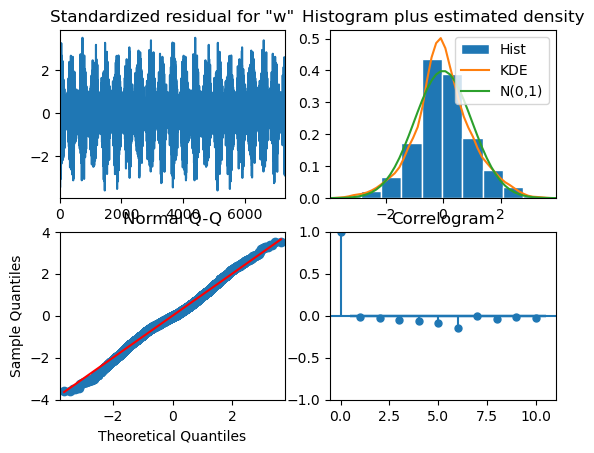

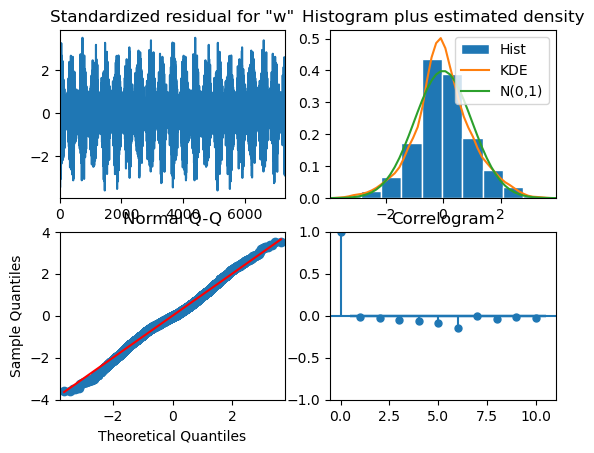

In [25]:
model_fit.plot_diagnostics()

In [30]:
model_fit.forecast(steps=10)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


7308   -177436.663540
7309   -173272.519104
7310   -170935.402300
7311   -167645.471549
7312   -166181.130540
7313   -173899.219065
7314   -172054.453615
7315   -171292.172546
7316   -170667.827595
7317   -170496.987819
Name: predicted_mean, dtype: float64

In [7]:
todays_forecast.columns

Index(['date', 'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'uv_index_max',
       'uv_index_clear_sky_max', 'precipitation_sum', 'rain_sum',
       'showers_sum', 'snowfall_sum', 'precipitation_hours',
       'precipitation_probability_max', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'season',
       'description', 'image', 'weather_score', 'event', 'weight',
       'weather_score_weighted'],
      dtype='object')

NameError: name 'params' is not defined

## Predicting today's event

In [16]:
todays_forecast

,date,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,sunshine_duration,...,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,season,description,image,weather_score,event,weight,weather_score_weighted
0,2024-06-01 07:00:00+00:00,80,78.6119,61.151897,79.066673,61.964233,0,0,59476.066406,43341.195312,...,5.896452,20.040001,0.165582,summer,Light Showers,http://openweathermap.org/img/wn/09d@2x.png,1,Storm,-86780.96875,-173561.9375


In [20]:

# historical_weather, historical_summary = musical_weather.get_stored_weather()
# todays_forecast = musical_weather.get_forecast()

# model_base, model_fit = musical_weather.create_weather_model(historical_weather)

# Fit the model to your data
# model_base.fit(todays_forecast['weather_score_weighted'])
# Fit the model
model_fit = model_base.fit()

# Get the fitted parameters
params = model_fit.params

# Use the model to make a prediction for the specified column in today's forecast
forecast = model_fit.predict(start=todays_forecast.index[0], end=todays_forecast.index[-1])

In [21]:
forecast

date
2014-05-29    0.0
dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split your data into a training set and a test set
X = historical_summary['weather_score_weighted'].values.reshape(-1, 1)  # Features
y = historical_summary['event']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ValueError: could not convert string to float: 'Snow'

In [ ]:
import musical_weather
import pandas as pd

historical_weather, historical_summary = musical_weather.get_stored_weather()
todays_forecast = musical_weather.get_forecast()

model_base, model_fit = musical_weather.create_weather_model(historical_weather)

# Fit the model to your data
# model_base.fit(todays_forecast['weather_score_weighted'])

# Get the fitted parameters
params = model_fit.params

# Use the model to make a prediction for the specified column in today's forecast
forecast = model_base.predict(params, start=todays_forecast.index[0], end=todays_forecast.index[-1])

# Use the model to make a prediction for the specified column in today's forecast
forecast = model_base.predict(start=todays_forecast.index[0], end=todays_forecast.index[-1])

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

NotImplementedError: 

In [2]:
historical_weather, historical_summary = musical_weather.get_stored_weather()
todays_forecast = musical_weather.get_forecast()

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


In [4]:
todays_forecast

,date,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,sunshine_duration,...,rain_sum,showers_sum,snowfall_sum,precipitation_hours,precipitation_probability_max,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2024-06-01 07:00:00+00:00,80.0,78.6119,60.881901,79.066673,61.76432,0,0,59476.066406,45800.570312,...,0.015748,0.015748,0.0,2.0,87.0,10.634577,38.028999,6.24762,20.41,0.167302


In [5]:
# Assuming 'date' is the name of your date column
numerical_columns = historical_weather.select_dtypes(include=[np.number]).columns.tolist()
selected_columns = ['date'] + numerical_columns
historical_weather = historical_weather[selected_columns]

NameError: name 'todays_forecast' is not defined

In [12]:
from statsmodels.tsa.arima.model import ARIMA


# Define the model
model_base = ARIMA(historical_weather, order=(1, 1, 1))

# Fit the model
model_fit = model_base.fit()

# Make a prediction
forecast = model_fit.predict(start=todays_forecast.index[0], end=todays_forecast.index[-1])

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [15]:
historical_weather

,_id,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,season,description,weather_score,event,weight,weather_score_weighted
date,,,,,,,,,,,,,,,,,,,,,
2014-05-29,66596e308270001ec1e670c4,53,55.560200,46.920200,51.236454,49.730995,41.166126,45.717590,0,0,...,11.240786,23.041100,27.949711,11.630000,spring,Drizzle,1,Drizzle,-38769.093750,-77538.187500
2014-05-30,66596e308270001ec1e670c5,1,64.830200,43.230202,55.830204,62.282356,39.276634,52.090046,0,0,...,9.440564,22.593700,318.073792,23.850000,spring,Mainly Sunny,2,Sun,104895.593750,314686.781250
2014-05-31,66596e308270001ec1e670c6,2,66.360199,47.460197,57.855206,62.808754,42.597816,54.435932,0,0,...,9.812248,22.817400,292.693787,26.799999,winter,Partly Cloudy,1,Cloud,105592.242188,211184.484375
2014-06-01,66596e308270001ec1e670c7,2,64.650200,49.170200,57.138947,61.689705,45.978081,53.891354,0,0,...,7.726561,18.567101,317.268646,24.600000,summer,Partly Cloudy,1,Cloud,106733.328125,213466.656250
2014-06-02,66596e308270001ec1e670c8,51,64.830200,48.180199,57.652695,62.277229,45.301971,54.428406,0,0,...,8.701326,18.119701,17.676233,18.940001,summer,Light Drizzle,1,Drizzle,-60607.578125,-121215.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-25,66596e48fb06e58d527def79,63,72.965302,59.195301,65.742805,73.742950,59.159840,66.494850,0,0,...,8.984278,18.343399,159.443863,23.250000,spring,Rain,1,Rain,-88637.390625,-177274.781250
2024-05-26,66596e48fb06e58d527def7a,51,74.585304,56.855301,65.499046,78.446136,57.621593,66.865181,0,0,...,10.739930,20.132999,143.262344,22.360001,spring,Light Drizzle,1,Drizzle,-98479.859375,-196959.718750
2024-05-27,66596e48fb06e58d527def7b,63,72.695297,59.645302,65.465294,75.624985,58.899506,66.640358,0,0,...,11.602247,21.027800,141.277328,17.110001,spring,Rain,1,Rain,-72175.476562,-144350.953125


In [14]:
from pmdarima import auto_arima

# Fit auto_arima function to your historical data
stepwise_fit = auto_arima(historical_weather, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

TypeError: float() argument must be a string or a real number, not 'ObjectId'

In [ ]:
model_base = ARIMA(historical_weather, order=stepwise_fit.order)

## Playilst and weather matching

In [1]:
import spotify_enrichment

print("Getting spotify data...")
playlist_df, season_music, weather_music, playlists_without_track_info, playlists_without_data, le_event = spotify_enrichment.get_playlist_data()

# playlist_df.to_csv("spotify_data.csv", index=False)

print("Storing spotify data...")
spotify_enrichment.store_music_data(season_music, weather_music)
print("Spotify data stored.")


Getting spotify data...
Processing Playlist 1/99
Getting track info for playlist 37i9dQZF1EIh5QTm0PNBlW
Getting tracks for playlist 37i9dQZF1EIh5QTm0PNBlW
Getting audio features for 50 track ids
Processed Song 50: FKJ - Artist: Ylang Ylangeeopatrayion Picture Soundtrackt All)ain
Finished processing playlist 37i9dQZF1EIh5QTm0PNBlW
Processing Playlist 2/99
Getting track info for playlist 37i9dQZF1DX4aYNO8X5RpR
Getting tracks for playlist 37i9dQZF1DX4aYNO8X5RpR
Getting audio features for 100 track ids
Processed Song 98: Taranis - Artist: Dark Stormer Coverd Thunderh Thundertant Stormunder
Finished processing playlist 37i9dQZF1DX4aYNO8X5RpR
Processing Playlist 3/99
Getting track info for playlist 4X4dEJ2dDkT11S8UBR6wTO
Getting tracks for playlist 4X4dEJ2dDkT11S8UBR6wTO
Getting audio features for 100 track ids
Processed Song 100: jagger finn - Artist: Vase Songigh)Girler JeanSads) the Darkigh?
Finished processing playlist 4X4dEJ2dDkT11S8UBR6wTO
Processing Playlist 4/99
Getting track info fo

d:\Backup\repos\Musical-Weather\spotify_enrichment.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df.loc[:, column + "_st_scale"] = scaler.fit_transform(playlist_df[[column]])
d:\Backup\repos\Musical-Weather\spotify_enrichment.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df.loc[:, column + "_power_transform"] = power_transformer.fit_transform(playlist_df[[column]])
d:\Backup\repos\Musical-Weather\spotify_enrichment.py:135: SettingWithCopyWarning: 
A value is trying to be se

Storing spotify data...
season_music is either not a DataFrame or is empty
weather_music is either not a DataFrame or is empty
Spotify data stored.


In [3]:
playlist_df

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,liveness_quantile_transform,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score
0,-9.514,0.0452,0.272000,0.6380,3,Lord Huron,3hRV0jL3vUpRrcy398teAU,The Night We Met,Rain,Weather,...,0.974474,0.0998,174.097,208212,-2.101430,0.987487,1,3,-1907.053980,NaN
1,-7.028,0.0277,0.000023,0.1330,4,Creedence Clearwater Revival,2LawezPeJhN4AWuSB0GtAU,Have You Ever Seen The Rain,Rain,Weather,...,0.610611,0.7740,116.109,160133,0.196259,0.975475,1,3,-3013.900961,NaN
2,-13.858,0.0426,0.000001,0.1140,3,keshi,72sfmdpuO5r8cBDgs7MqZZ,UNDERSTAND,Rain,Weather,...,0.473974,0.1630,82.085,150520,-2.101430,0.774775,1,3,-2368.808960,NaN
3,-6.032,0.0281,0.005370,0.1080,4,Hozier,37zuIvk4KBkAxxLJsxJaHq,Would That I,Rain,Weather,...,0.374875,0.5020,130.694,268293,0.196259,0.726226,1,3,-3220.633336,NaN
4,-23.625,0.0598,0.765000,0.1080,3,Elliott Smith,52Bg6oaos7twR7IUtEpqcE,Between The Bars,Rain,Weather,...,0.374875,0.3420,135.298,141280,-2.101430,0.552052,1,3,-1623.513514,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,-9.785,0.0342,0.579000,0.0857,3,Radiohead,35YyxFpE0ZTOoqFx5bADW8,Nude,Winter,Season,...,0.134635,0.1670,128.378,255387,-2.101430,0.611612,0,9,2675.906179,NaN
8015,-6.780,0.0336,0.760000,0.1020,4,Clams Casino,0FVuyC9RP5MACjp4lgU3qZ,I'm God,Winter,Season,...,0.287287,0.0890,141.931,277711,0.196259,0.750250,0,9,2820.972040,NaN
8016,-10.254,0.0262,0.832000,0.0957,3,Deftones,27gb40S6AIpP5lrhLxlfXj,Anniversary of an Uninteresting Event,Winter,Season,...,0.216216,0.0432,87.029,237333,-2.101430,0.284284,0,9,3240.342498,NaN
8018,-5.534,0.0500,0.649000,0.0643,4,siouxxie sixxsta,0eBYSImMbB5jCoXzfhLCs2,ketamine,Winter,Season,...,0.037788,0.9360,141.213,125534,0.196259,0.146146,0,9,2740.004626,NaN


In [1]:
import spotify_enrichment
import pandas as pd

playlist_df = pd.read_csv("spotify_data.csv")

season_music = spotify_enrichment.get_season_music(playlist_df)
weather_music = spotify_enrichment.get_weather_music(playlist_df)

In [2]:
weather_music

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,liveness_quantile_transform,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score
0,-9.514,0.0452,0.272000,0.6380,3,Lord Huron,3hRV0jL3vUpRrcy398teAU,The Night We Met,Rain,Weather,...,0.974474,0.0998,174.097,208212,-2.101430,0.987487,1,3,-1907.053980,NaN
1,-7.028,0.0277,0.000023,0.1330,4,Creedence Clearwater Revival,2LawezPeJhN4AWuSB0GtAU,Have You Ever Seen The Rain,Rain,Weather,...,0.610611,0.7740,116.109,160133,0.196259,0.975475,1,3,-3013.900961,NaN
2,-13.858,0.0426,0.000001,0.1140,3,keshi,72sfmdpuO5r8cBDgs7MqZZ,UNDERSTAND,Rain,Weather,...,0.473974,0.1630,82.085,150520,-2.101430,0.774775,1,3,-2368.808960,NaN
3,-6.032,0.0281,0.005370,0.1080,4,Hozier,37zuIvk4KBkAxxLJsxJaHq,Would That I,Rain,Weather,...,0.374875,0.5020,130.694,268293,0.196259,0.726226,1,3,-3220.633336,NaN
4,-23.625,0.0598,0.765000,0.1080,3,Elliott Smith,52Bg6oaos7twR7IUtEpqcE,Between The Bars,Rain,Weather,...,0.374875,0.3420,135.298,141280,-2.101430,0.552052,1,3,-1623.513514,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,-11.570,0.0281,0.000229,0.1670,3,Lamp,3tu3nbfeAwQ8xgi2YrnQBA,Old Notebook,Drizzle,Weather,...,0.710210,0.3450,150.333,279186,-2.101430,0.190691,1,1,-2803.517200,NaN
4725,-12.149,0.0322,0.000722,0.1260,4,Lamp,05TWN8gERjdwtKYBsEmxwW,Amidst the Morning Fog,Drizzle,Weather,...,0.571071,0.1390,130.314,283900,0.196259,0.190691,1,1,-2808.384035,NaN
4726,-12.120,0.0325,0.144000,0.1190,4,Lamp,1nPXBgflWZSAomAon6i7qw,Alone in My Room,Drizzle,Weather,...,0.527027,0.0866,120.308,281482,0.196259,0.266266,1,1,-2749.378159,NaN
4727,-15.870,0.0311,0.414000,0.1300,4,Lamp,6gjLFDKn5F1yFY3p1mOE00,Night Drizzle,Drizzle,Weather,...,0.595095,0.0729,131.115,176411,0.196259,0.195195,1,1,-1680.667719,NaN


In [4]:
season_music

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,liveness_quantile_transform,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score
4729,-5.505,0.0412,0.000809,0.0398,4,Hozier,5Z0UnEtpLDQyYlWwgi8m9C,Too Sweet,Spring,Season,...,0.005335,0.9340,117.038,251424,0.196259,0.990991,0,5,3845.255363,NaN
4730,-4.083,0.0284,0.006780,0.1670,4,Tame Impala,6K4t31amVTZDgR3sKmwUJJ,The Less I Know The Better,Spring,Season,...,0.710210,0.7850,116.879,216320,0.196259,0.966466,0,5,3531.652967,NaN
4731,-5.334,0.0304,0.000341,0.0618,4,The 1975,3TgMcrV32NUKjEG2ujn9eh,It's Not Living (If It's Not With You),Spring,Season,...,0.033033,0.5260,121.231,248336,0.196259,0.657658,0,5,3563.158353,NaN
4732,-7.990,0.1740,0.000000,0.2030,4,Sandro Cavazza,43Hit5V2BpPq2vxvca3ysc,Lean On Me,Spring,Season,...,0.762262,0.7160,156.055,182497,0.196259,0.382382,0,5,2487.740261,NaN
4733,-5.840,0.0357,0.000000,0.0982,4,Kygo,0kHyKhJMukHEPfeh8s7rdM,Born To Be Yours,Spring,Season,...,0.247247,0.4510,114.011,193321,0.196259,0.635135,0,5,3012.054632,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7804,-9.785,0.0342,0.579000,0.0857,3,Radiohead,35YyxFpE0ZTOoqFx5bADW8,Nude,Winter,Season,...,0.134635,0.1670,128.378,255387,-2.101430,0.611612,0,9,2675.906179,NaN
7805,-6.780,0.0336,0.760000,0.1020,4,Clams Casino,0FVuyC9RP5MACjp4lgU3qZ,I'm God,Winter,Season,...,0.287287,0.0890,141.931,277711,0.196259,0.750250,0,9,2820.972040,NaN
7806,-10.254,0.0262,0.832000,0.0957,3,Deftones,27gb40S6AIpP5lrhLxlfXj,Anniversary of an Uninteresting Event,Winter,Season,...,0.216216,0.0432,87.029,237333,-2.101430,0.284284,0,9,3240.342498,NaN
7807,-5.534,0.0500,0.649000,0.0643,4,siouxxie sixxsta,0eBYSImMbB5jCoXzfhLCs2,ketamine,Winter,Season,...,0.037788,0.9360,141.213,125534,0.196259,0.146146,0,9,2740.004626,NaN
